<a href="https://colab.research.google.com/github/dinarrahman30/Machine-Learning-Terapan/blob/main/Predictive_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Informasi Data Diri
Nama: Dinar Wahyu Rahman

Username Dicoding: dinar_wahyu

Email: dinarrahman30@gmail.com

LinkedIn: [Dinar Wahyu Rahman]('https:www.linkedin.com/in/dinar-wahyu-rahman/')

Alamat: Kota Jakarta Barat, DKI Jakarta

# Predictive modeling of customer bookings

![British Airways](https://media.cntraveler.com/photos/577fcc03e0b5a6244f4c789c/16:9/w_2560%2Cc_limit/BritishAirways-Boeing777-AlamyF1KW8J.jpg)

## Deskripsi Proyek

Proyek ini bertujuan untuk membuat pemodelan prediktif pemesanan pelanggan dengan pendekatan analisis data yang menggunakan teknik pembelajaran mesin (machine learning) atau statistik untuk memprediksi perilaku pemesanan pelanggan di masa depan. Model ini sering digunakan untuk membantu bisnis memahami tren, mengantisipasi kebutuhan pelanggan, dan mengoptimalkan keputusan operasional.

## Import Library yang dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Understanding

Data Understanding merupakan proses memahami informasi dalam data dan menentukan kualitas dari data tersebut.

Dataset pada proyek ini didapat dari website https://www.airlinequality.com

In [2]:
df = pd.read_csv("/content/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


Metode `.head()` memungkinkan kita untuk melihat 5 baris pertama dalam dataset, ini berguna untuk inspeksi visual kolom kita

## Exploratory Data Analytics (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

Dapat kita lihat dataset asli sebelum di encoding,
- Jumlah data int64 berjumlah 8, data object berjumlah 5, dan data float64 berjumlah 1

Metode `.info()` memberi kita deskripsi data, yang memberi tahu kita nama kolom, tipe datanya, dan berapa banyak nilai null yang kita miliki. Untungnya, kita tidak memiliki nilai null. Sepertinya beberapa kolom ini harus diubah menjadi tipe data yang berbeda, misalnya flight_day.

Untuk memberikan konteks lebih lanjut, berikut adalah deskripsi data yang lebih rinci, menjelaskan secara tepat apa arti setiap kolom:

- `num_passengers` = jumlah penumpang yang bepergian
- `sales_channel` = saluran penjualan tempat pemesanan dilakukan
- `trip_type` = Jenis perjalanan (Pulang Pergi, Sekali Jalan, Perjalanan Lingkaran)
- `purchase_lead` = jumlah hari antara tanggal perjalanan dan tanggal pemesanan
- `length_of_stay` = jumlah hari yang dihabiskan di tempat tujuan
- `flight_hour` = jam keberangkatan pesawat
- `flight_day` = hari keberangkatan pesawat
- `route` = rute penerbangan asal -> tujuan
- `booking_origin` = negara tempat pemesanan dilakukan
- `wants_extra_baggage` = jika pelanggan menginginkan bagasi tambahan dalam pemesanan
- `wants_preferred_seat` = jika pelanggan menginginkan kursi pilihan dalam pemesanan
- `wants_in_flight_meals` = jika pelanggan menginginkan makanan dalam pesawat dalam pemesanan
- `flight_duration` = total durasi penerbangan (dalam jam)
- `booking_complete` = tanda yang menunjukkan apakah pelanggan telah menyelesaikan pemesanan


Sebelum kita menghitung statistik apa pun pada data, mari kita lakukan konversi data yang diperlukan

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

Konversi `flight_day` dari mengubah nilai-nilai dalam kolom `flight_day` di DataFrame df dari nama hari menjadi angka sesuai dengan urutan hari dalam satu minggu. Guna memudahkan dalam machine learning. Penjelasan detailnya:

mapping:

- Sebuah dictionary yang memetakan nama hari ke angka.
Contoh: "Mon" dipetakan menjadi 1, "Tue" menjadi 2, dan seterusnya.
`df["flight_day"].map(mapping)`:

- Fungsi .map() digunakan untuk mengganti setiap nilai dalam kolom `flight_day` dengan nilai yang sesuai dalam dictionary mapping.
Jika nilai dalam kolom tidak ada di mapping, nilai tersebut akan diganti menjadi NaN.

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


Metode `.describe()` memberi kita ringkasan statistik deskriptif atas keseluruhan set data (hanya berfungsi untuk kolom numerik). Ini memberi kita gambaran singkat tentang beberapa hal seperti mean, min, max, dan distribusi keseluruhan setiap kolom.

- Count adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom.
- 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.

In [8]:
df.shape

(50000, 14)

Dari eksekusi method `df.shape` Terlihat:

| Jumlah Baris	| Jumlah Kolom |
| ------ | ------ |
| 50000 |	14 |


### EDA - Check missing value

In [9]:
# Check for missing values
print(df.isnull().sum())
print(df.isna().sum())

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64
num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64


Tidak terdapat missing value pada dataset customer_booking.csv

### MI Score

In [10]:
# drop unused columns
x = df.drop(['booking_complete'], axis=1)
y = df['booking_complete']

#changing object dtype to int dtype
for colname in x.select_dtypes("object"):
    x[colname], _ = x[colname].factorize()

In [11]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(x, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index = x.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores

,MI Scores
route,0.051410
booking_origin,0.047534
flight_duration,0.015628
wants_extra_baggage,0.010273
length_of_stay,0.007032
sales_channel,0.003915
wants_in_flight_meals,0.003303
flight_hour,0.002227
flight_day,0.002101
trip_type,0.001977


Fungsi mutual_info_classif dari pustaka Scikit-learn adalah alat untuk mengukur ketergantungan antara setiap fitur dengan target dalam konteks klasifikasi. Fungsi ini berbasis konsep Mutual Information (MI), yang menggambarkan hubungan antara dua variabel (dalam hal ini fitur dan target) tanpa membuat asumsi linearitas.

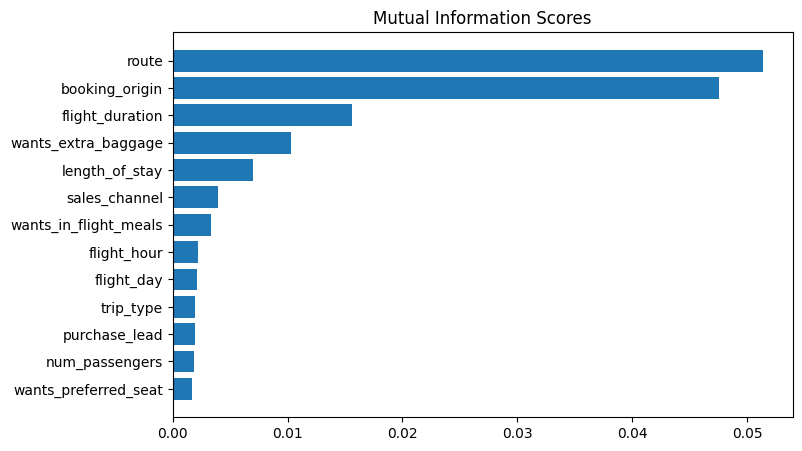

In [12]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [13]:
# categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

# checking unique values in categorical columns
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")

sales_channel: ['Internet' 'Mobile']
trip_type: ['RoundTrip' 'CircleTrip' 'OneWay']
route: ['AKLDEL' 'AKLHGH' 'AKLHND' 'AKLICN' 'AKLKIX' 'AKLKTM' 'AKLKUL' 'AKLMRU'
 'AKLPEK' 'AKLPVG' 'AKLTPE' 'AORICN' 'AORKIX' 'AORKTM' 'AORMEL' 'BBIMEL'
 'BBIOOL' 'BBIPER' 'BBISYD' 'BDOCTS' 'BDOCTU' 'BDOHGH' 'BDOICN' 'BDOIKA'
 'BDOKIX' 'BDOMEL' 'BDOOOL' 'BDOPEK' 'BDOPER' 'BDOPUS' 'BDOPVG' 'BDOSYD'
 'BDOTPE' 'BDOXIY' 'BKICKG' 'BKICTS' 'BKICTU' 'BKIHND' 'BKIICN' 'BKIKIX'
 'BKIKTM' 'BKIMEL' 'BKIMRU' 'BKIOOL' 'BKIPEK' 'BKIPER' 'BKIPUS' 'BKIPVG'
 'BKISYD' 'BKIXIY' 'BLRICN' 'BLRMEL' 'BLRPER' 'BLRSYD' 'BOMMEL' 'BOMOOL'
 'BOMPER' 'BOMSYD' 'BTJJED' 'BTUICN' 'BTUPER' 'BTUSYD' 'BTUWUH' 'BWNCKG'
 'BWNDEL' 'BWNHGH' 'BWNIKA' 'BWNKTM' 'BWNMEL' 'BWNOOL' 'BWNPER' 'BWNSYD'
 'BWNTPE' 'CANDEL' 'CANIKA' 'CANMEL' 'CANMRU' 'CANOOL' 'CANPER' 'CANSYD'
 'CCUMEL' 'CCUMRU' 'CCUOOL' 'CCUPER' 'CCUSYD' 'CCUTPE' 'CEBMEL' 'CEBOOL'
 'CEBPER' 'CEBSYD' 'CGKCKG' 'CGKCTS' 'CGKCTU' 'CGKDEL' 'CGKHGH' 'CGKHND'
 'CGKICN' 'CGKIKA' 'CGKJED' 'CGKK

## Data Preparation

Data Preparation merupakan tahap untuk mempersiapkan data sebelum masuk ke tahap pembuatan model Machine Learning.

### Label Encoding

Label Encoding adalah metode untuk mengonversi variabel kategorikal menjadi nilai numerik. Setiap kategori unik dalam kolom akan diberi nilai integer yang berbeda. Teknik ini digunakan untuk mengubah data kategorikal sehingga dapat digunakan oleh algoritma machine learning yang hanya menerima data numerik.

In [14]:
# label encoding the categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  int64  
 2   trip_type              50000 non-null  int64  
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  int64  
 8   booking_origin         50000 non-null  int64  
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 5.3 MB


Dapat kita lihat data yang sesuah di encoding:

- Jumlah data 1 fitur bertipe float64, 8 fitur bertipe int64, dan 5 fitur bertipe object.

### Train-test-split

In [16]:
# test train split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Model Development

Ada tiga algoritma model machine learning yang dicoba dan dibandingkan tingkat akurasi dari masing-masing model untuk mendapatkan hasil akurasi terbaik, yaitu

* Random Forest
* XGBoost
* Logistic Regression

In [17]:
from sklearn.ensemble import RandomForestClassifier # Random Forest
from xgboost import XGBClassifier                   # XGBoost
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report  # Evaluasi

### Random forest

In [18]:
# Random Forest

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(n_estimators=100)

# Melatih model
rf_model.fit(x_train, y_train)

# Membuat prediksi pada data test
y_pred = rf_model.predict(x_test)
y_pred_proba = rf_model.predict_proba(x_test)[:, 1]  # Probabilitas untuk AUC

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

# Output hasil evaluasi
print("Random Forest Accuracy:", accuracy)
print("Random Forest AUC Score:", auc)

Random Forest Accuracy: 0.8561
Random Forest AUC Score: 0.7777264544474051


### Gradient Boosting Classifier (XGBoost)

In [19]:
# Gradient Boosting Classifier (XGBoost)
# Inisialisasi model XGBoost
xgb_model = XGBClassifier(random_state=42)

# Melatih model
xgb_model.fit(x_train, y_train)

# Membuat prediksi pada data test
y_pred = xgb_model.predict(x_test)
y_pred_proba = xgb_model.predict_proba(x_test)[:, 1]  # Probabilitas untuk AUC

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

# Output hasil evaluasi
print("XGBoost Accuracy:", accuracy)
print("XGBoost AUC Score:", auc)

XGBoost Accuracy: 0.851
XGBoost AUC Score: 0.7843750793046568


### Logistic Regression

In [20]:
# Logistic Regression

# Logistic Regression Model
logistic_model = LogisticRegression(max_iter=100)

# Train the model
logistic_model.fit(x_train, y_train)

# Predict on test set
y_pred = logistic_model.predict(x_test)
y_pred_proba = logistic_model.predict_proba(x_test)[:, 1]  # Probabilities for AUC

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

# Print results
print("Logistic Regression Accuracy:", accuracy)
print("Logistic Regression AUC Score:", auc)

Logistic Regression Accuracy: 0.852
Logistic Regression AUC Score: 0.6831431607664002


## Evaluate and Present Findings

In [21]:
# Evaluasi semua model
from sklearn.metrics import accuracy_score, classification_report

all_models = {
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "Logistic Regression": logistic_model
}

for model_name, model in all_models.items():
    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"{model_name} Accuracy: {accuracy}")
    print(f"{model_name} Classification Report:\n{report}\n")
    print("-" * 50)
    print()

Random Forest Accuracy: 0.8561
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.57      0.11      0.19      1480

    accuracy                           0.86     10000
   macro avg       0.72      0.55      0.55     10000
weighted avg       0.82      0.86      0.81     10000


--------------------------------------------------

XGBoost Accuracy: 0.851
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8520
           1       0.49      0.12      0.19      1480

    accuracy                           0.85     10000
   macro avg       0.68      0.55      0.55     10000
weighted avg       0.81      0.85      0.81     10000


--------------------------------------------------

Logistic Regression Accuracy: 0.852
Logistic Regression Classification Report:
              precision    recall  f1-

### Feature Important

In [23]:
# Feature Important
importances = all_models['Random Forest'].feature_importances_  # Use the RandomForestClassifier from all_models dictionary
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" %
          (f + 1, indices[f], importances[indices[f]]))
    print(x_train.columns[indices[f]])
    print()

Feature ranking:
1. feature 3 (0.193259)
purchase_lead

2. feature 7 (0.151357)
route

3. feature 5 (0.140678)
flight_hour

4. feature 4 (0.123762)
length_of_stay

5. feature 8 (0.110700)
booking_origin

6. feature 6 (0.091272)
flight_day

7. feature 12 (0.073597)
flight_duration

8. feature 0 (0.048405)
num_passengers

9. feature 11 (0.021285)
wants_in_flight_meals

10. feature 10 (0.017357)
wants_preferred_seat

11. feature 9 (0.015138)
wants_extra_baggage

12. feature 1 (0.011553)
sales_channel

13. feature 2 (0.001637)
trip_type

